In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix , classification_report , f1_score , accuracy_score ,recall_score , roc_curve , precision_score


In [3]:
data = pd.read_csv("train.csv")

In [3]:
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [4]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [6]:
data.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [7]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

## **Partie de cleaning**

In [9]:
data.duplicated().sum()

np.int64(0)

In [10]:
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

- **visualisation avec histogrammes**

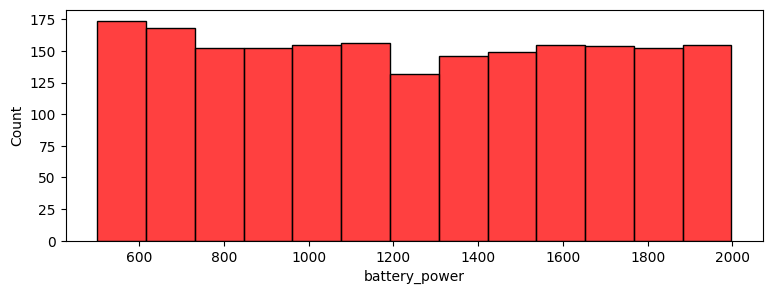

In [11]:
plt.figure(figsize = (9,3))
sns.histplot(data = data["battery_power"],color = "red")
plt.show()

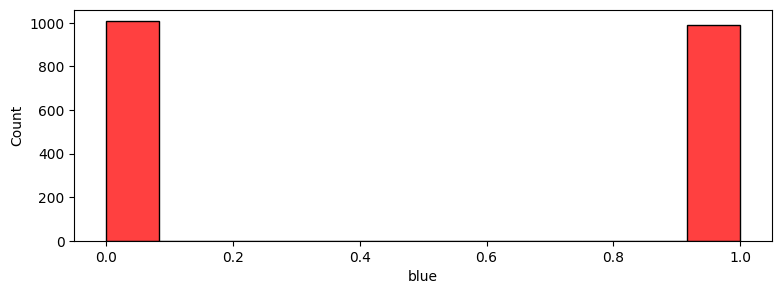

In [12]:
plt.figure(figsize = (9,3))
sns.histplot(data = data["blue"],color = "red")
plt.show()

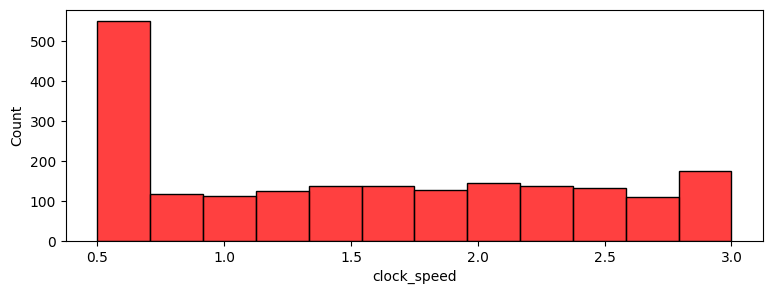

In [13]:
plt.figure(figsize = (9,3))
sns.histplot(data = data["clock_speed"],color = "red")
plt.show()

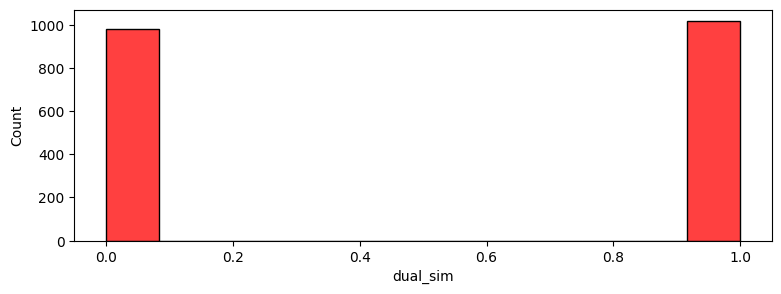

In [14]:
plt.figure(figsize = (9,3))
sns.histplot(data = data["dual_sim"],color = "red")
plt.show()

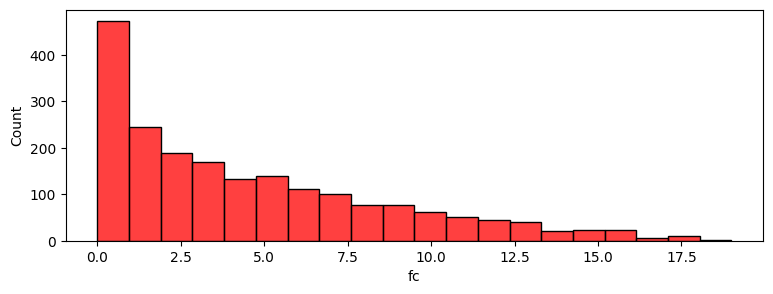

In [16]:
plt.figure(figsize = (9,3))
sns.histplot(data = data["fc"],color = "red")
plt.show()

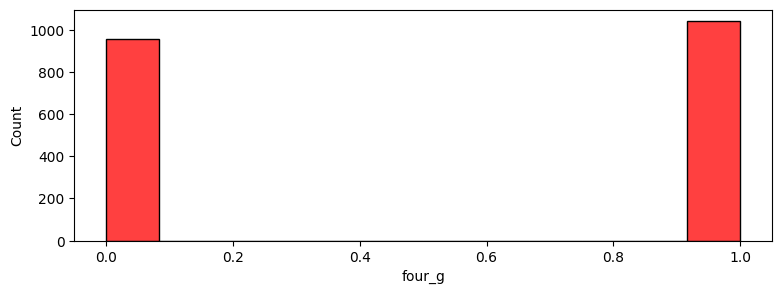

In [17]:
plt.figure(figsize = (9,3))
sns.histplot(data = data["four_g"],color = "red")
plt.show()

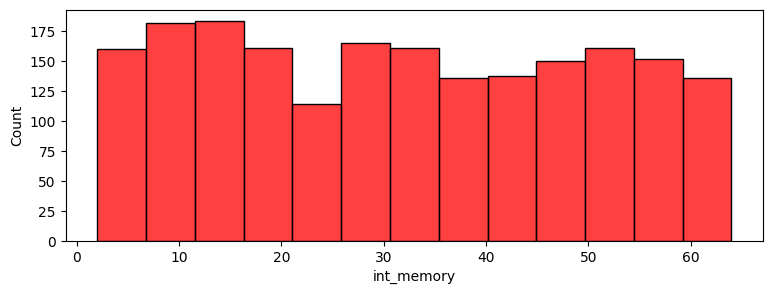

In [18]:
plt.figure(figsize = (9,3))
sns.histplot(data = data["int_memory"],color = "red")
plt.show()

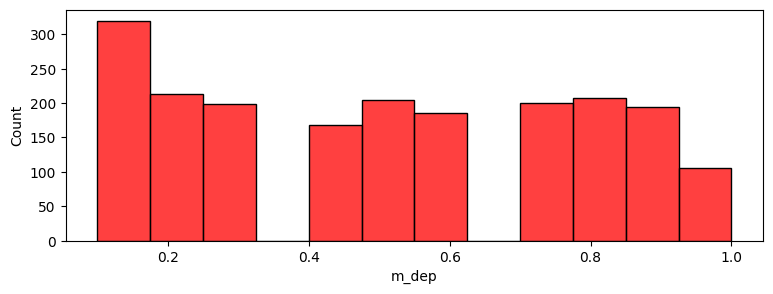

In [19]:
plt.figure(figsize = (9,3))
sns.histplot(data = data["m_dep"],color = "red")
plt.show()

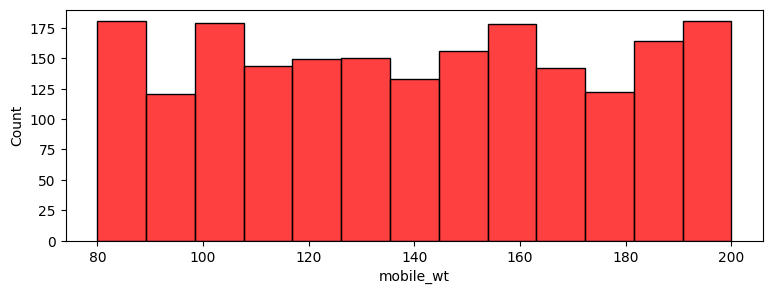

In [20]:
plt.figure(figsize = (9,3))
sns.histplot(data = data["mobile_wt"],color = "red")
plt.show()

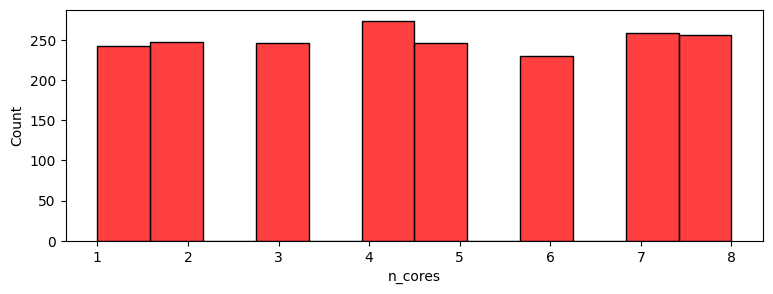

In [21]:
plt.figure(figsize = (9,3))
sns.histplot(data = data["n_cores"],color = "red")
plt.show()

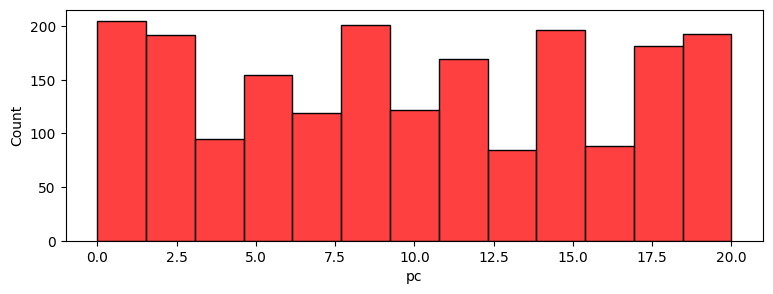

In [22]:
plt.figure(figsize = (9,3))
sns.histplot(data = data["pc"],color = "red")
plt.show()

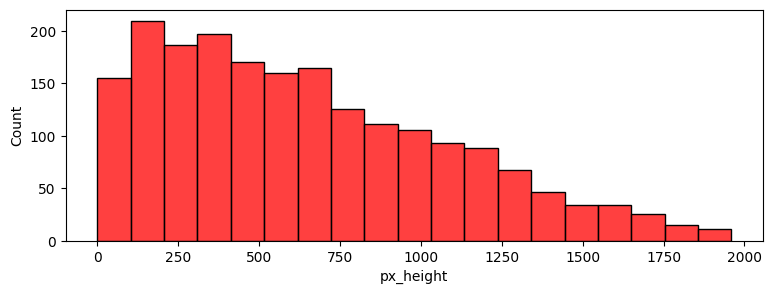

In [23]:
plt.figure(figsize = (9,3))
sns.histplot(data = data["px_height"],color = "red")
plt.show()

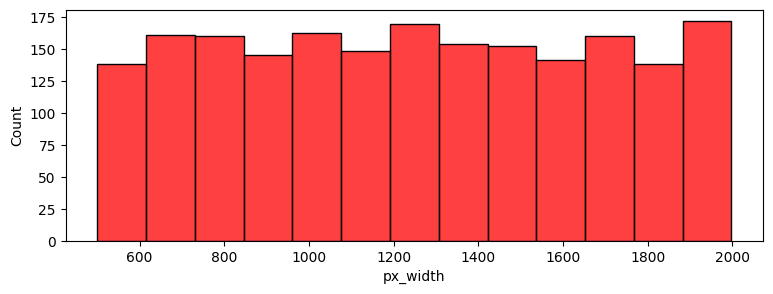

In [24]:
plt.figure(figsize = (9,3))
sns.histplot(data = data["px_width"],color = "red")
plt.show()

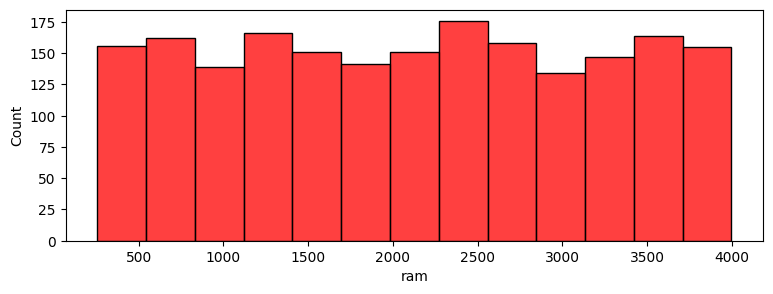

In [25]:
plt.figure(figsize = (9,3))
sns.histplot(data = data["ram"],color = "red")
plt.show()

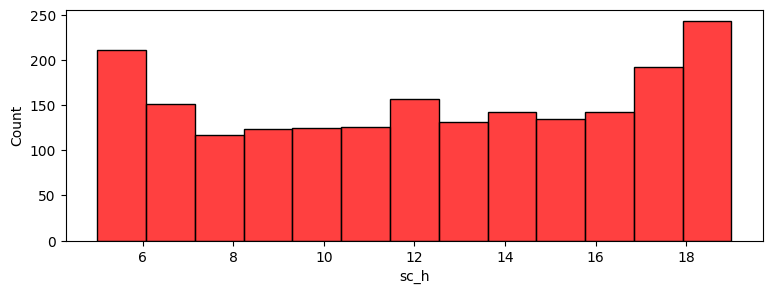

In [26]:
plt.figure(figsize = (9,3))
sns.histplot(data = data["sc_h"],color = "red")
plt.show()

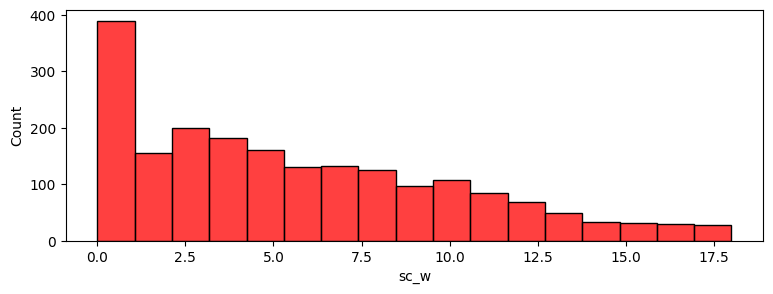

In [27]:
plt.figure(figsize = (9,3))
sns.histplot(data = data["sc_w"],color = "red")
plt.show()

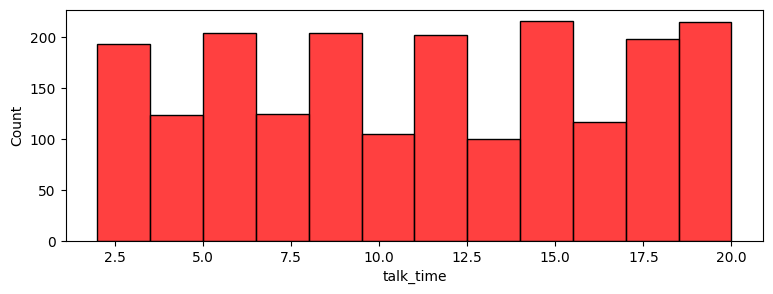

In [28]:
plt.figure(figsize = (9,3))
sns.histplot(data = data["talk_time"],color = "red")
plt.show()

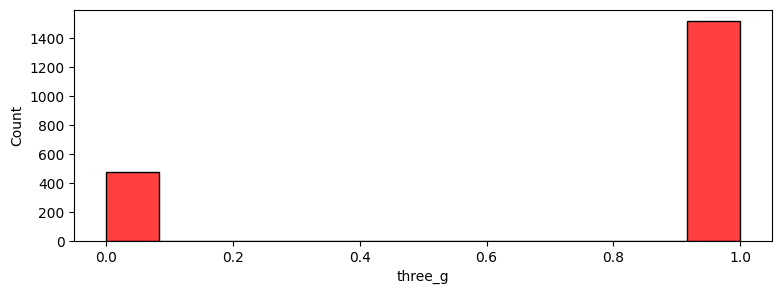

In [29]:
plt.figure(figsize = (9,3))
sns.histplot(data = data["three_g"],color = "red")
plt.show()

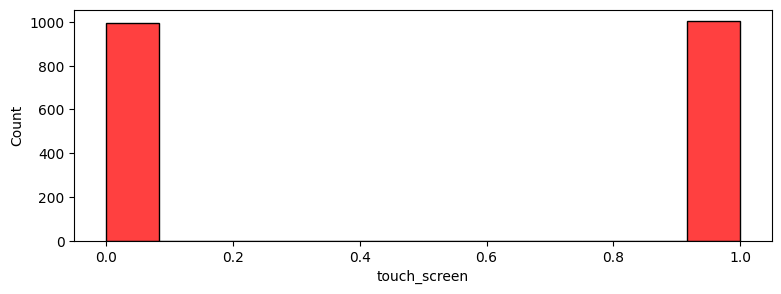

In [30]:
plt.figure(figsize = (9,3))
sns.histplot(data = data["touch_screen"],color = "red")
plt.show()

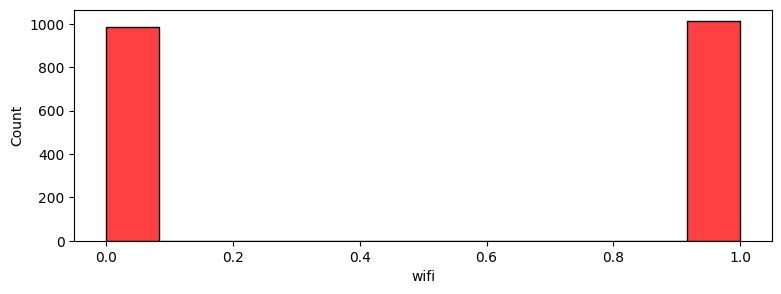

In [31]:
plt.figure(figsize = (9,3))
sns.histplot(data = data["wifi"],color = "red")
plt.show()

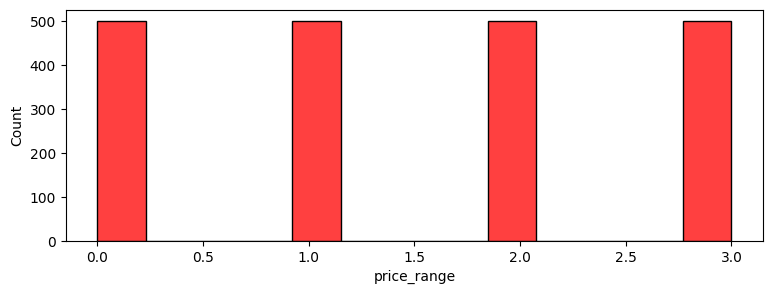

In [32]:
plt.figure(figsize = (9,3))
sns.histplot(data = data["price_range"],color = "red")
plt.show()

- **Boxplot**

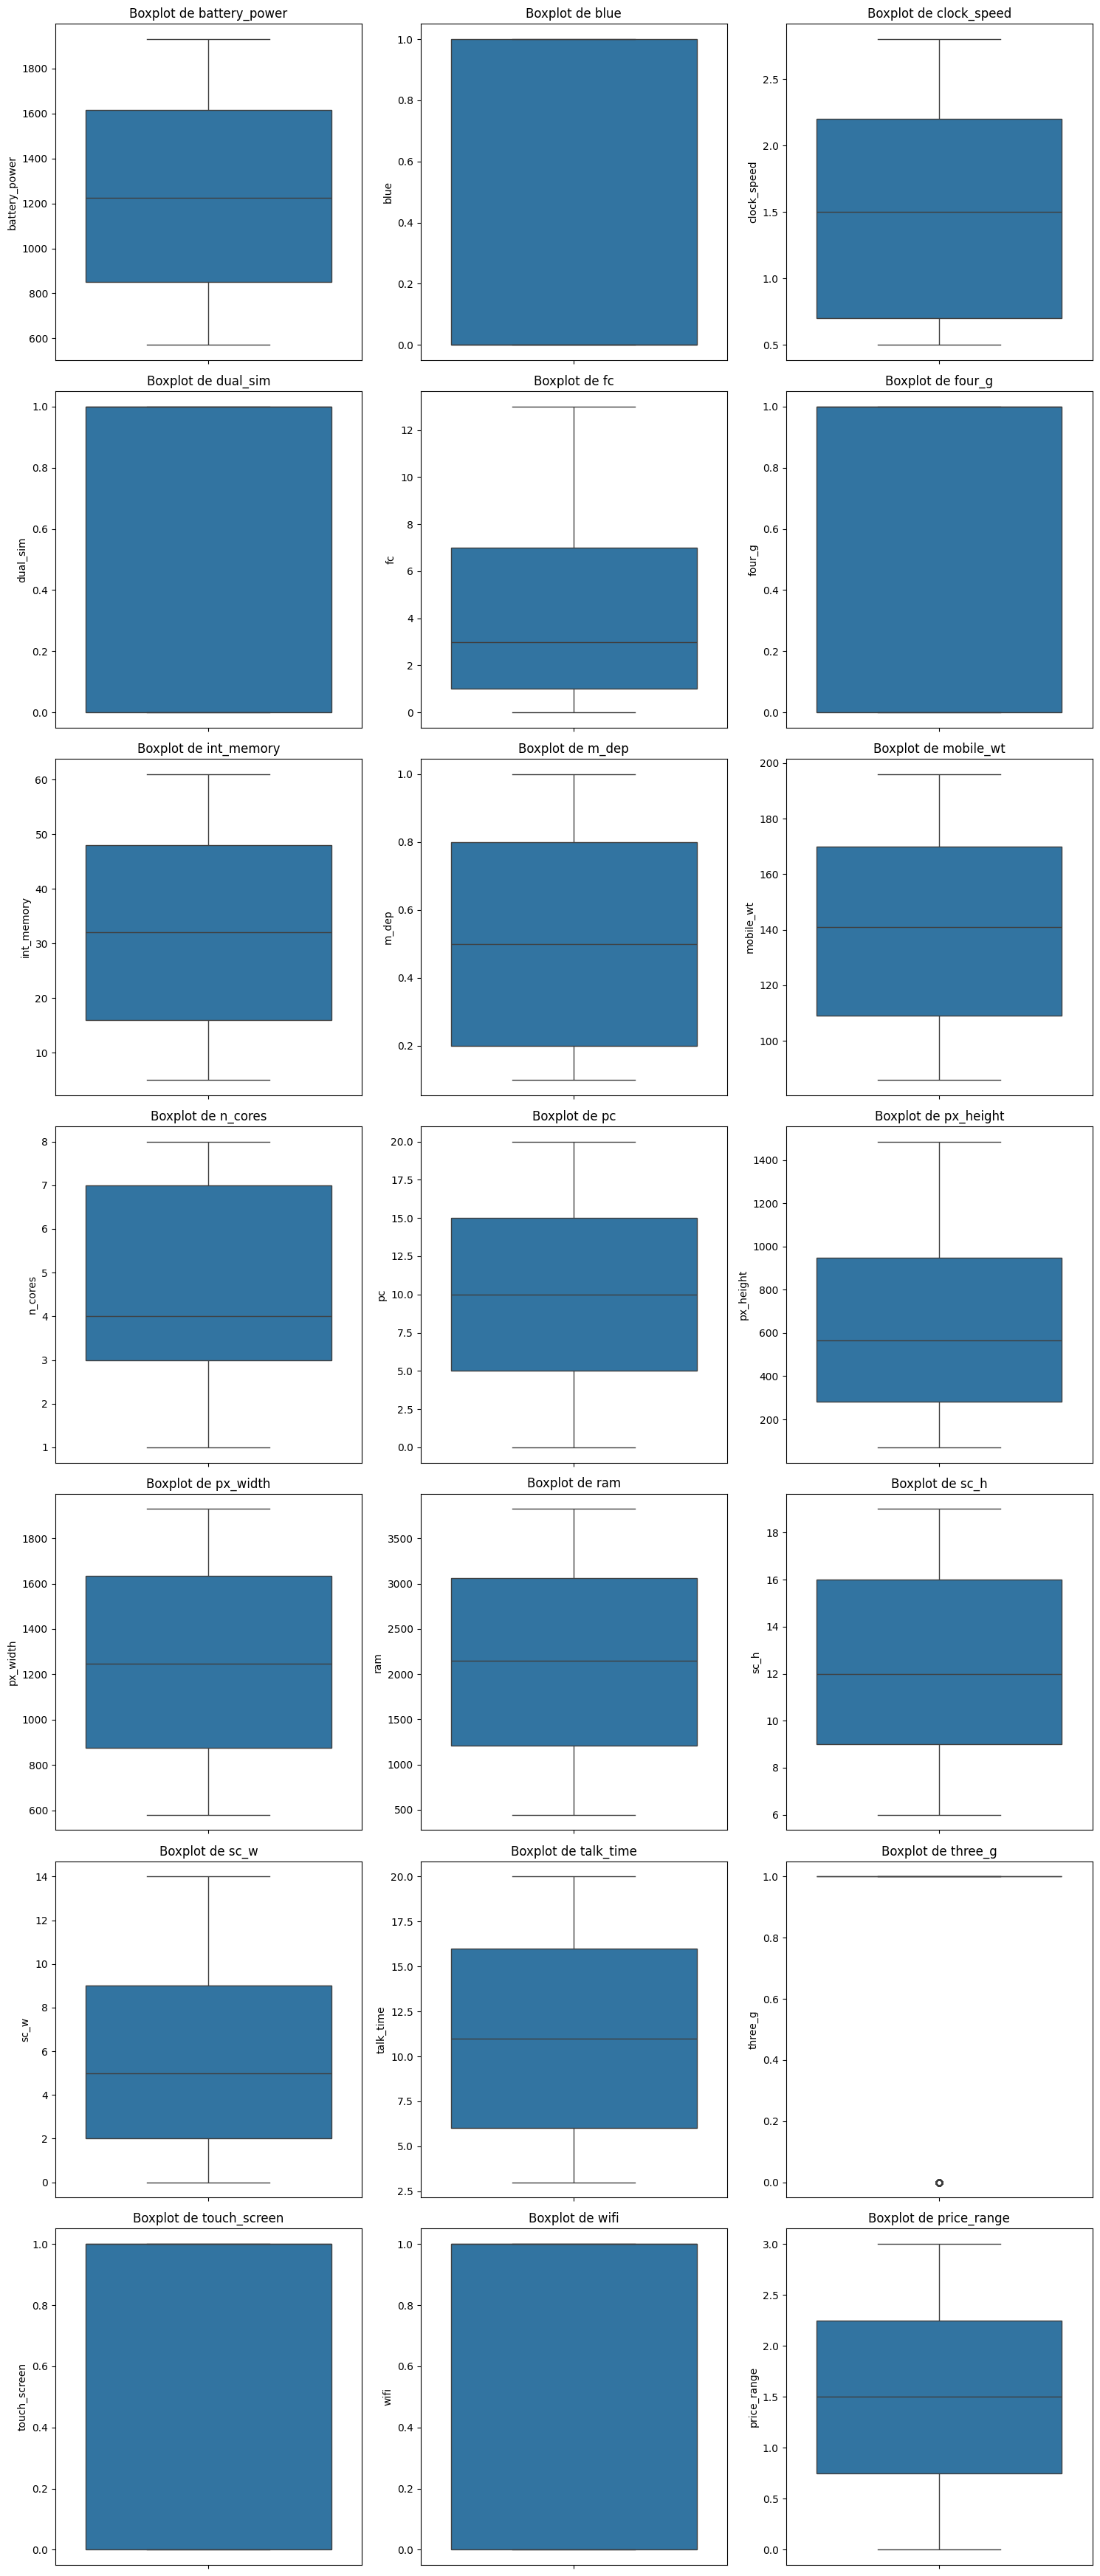

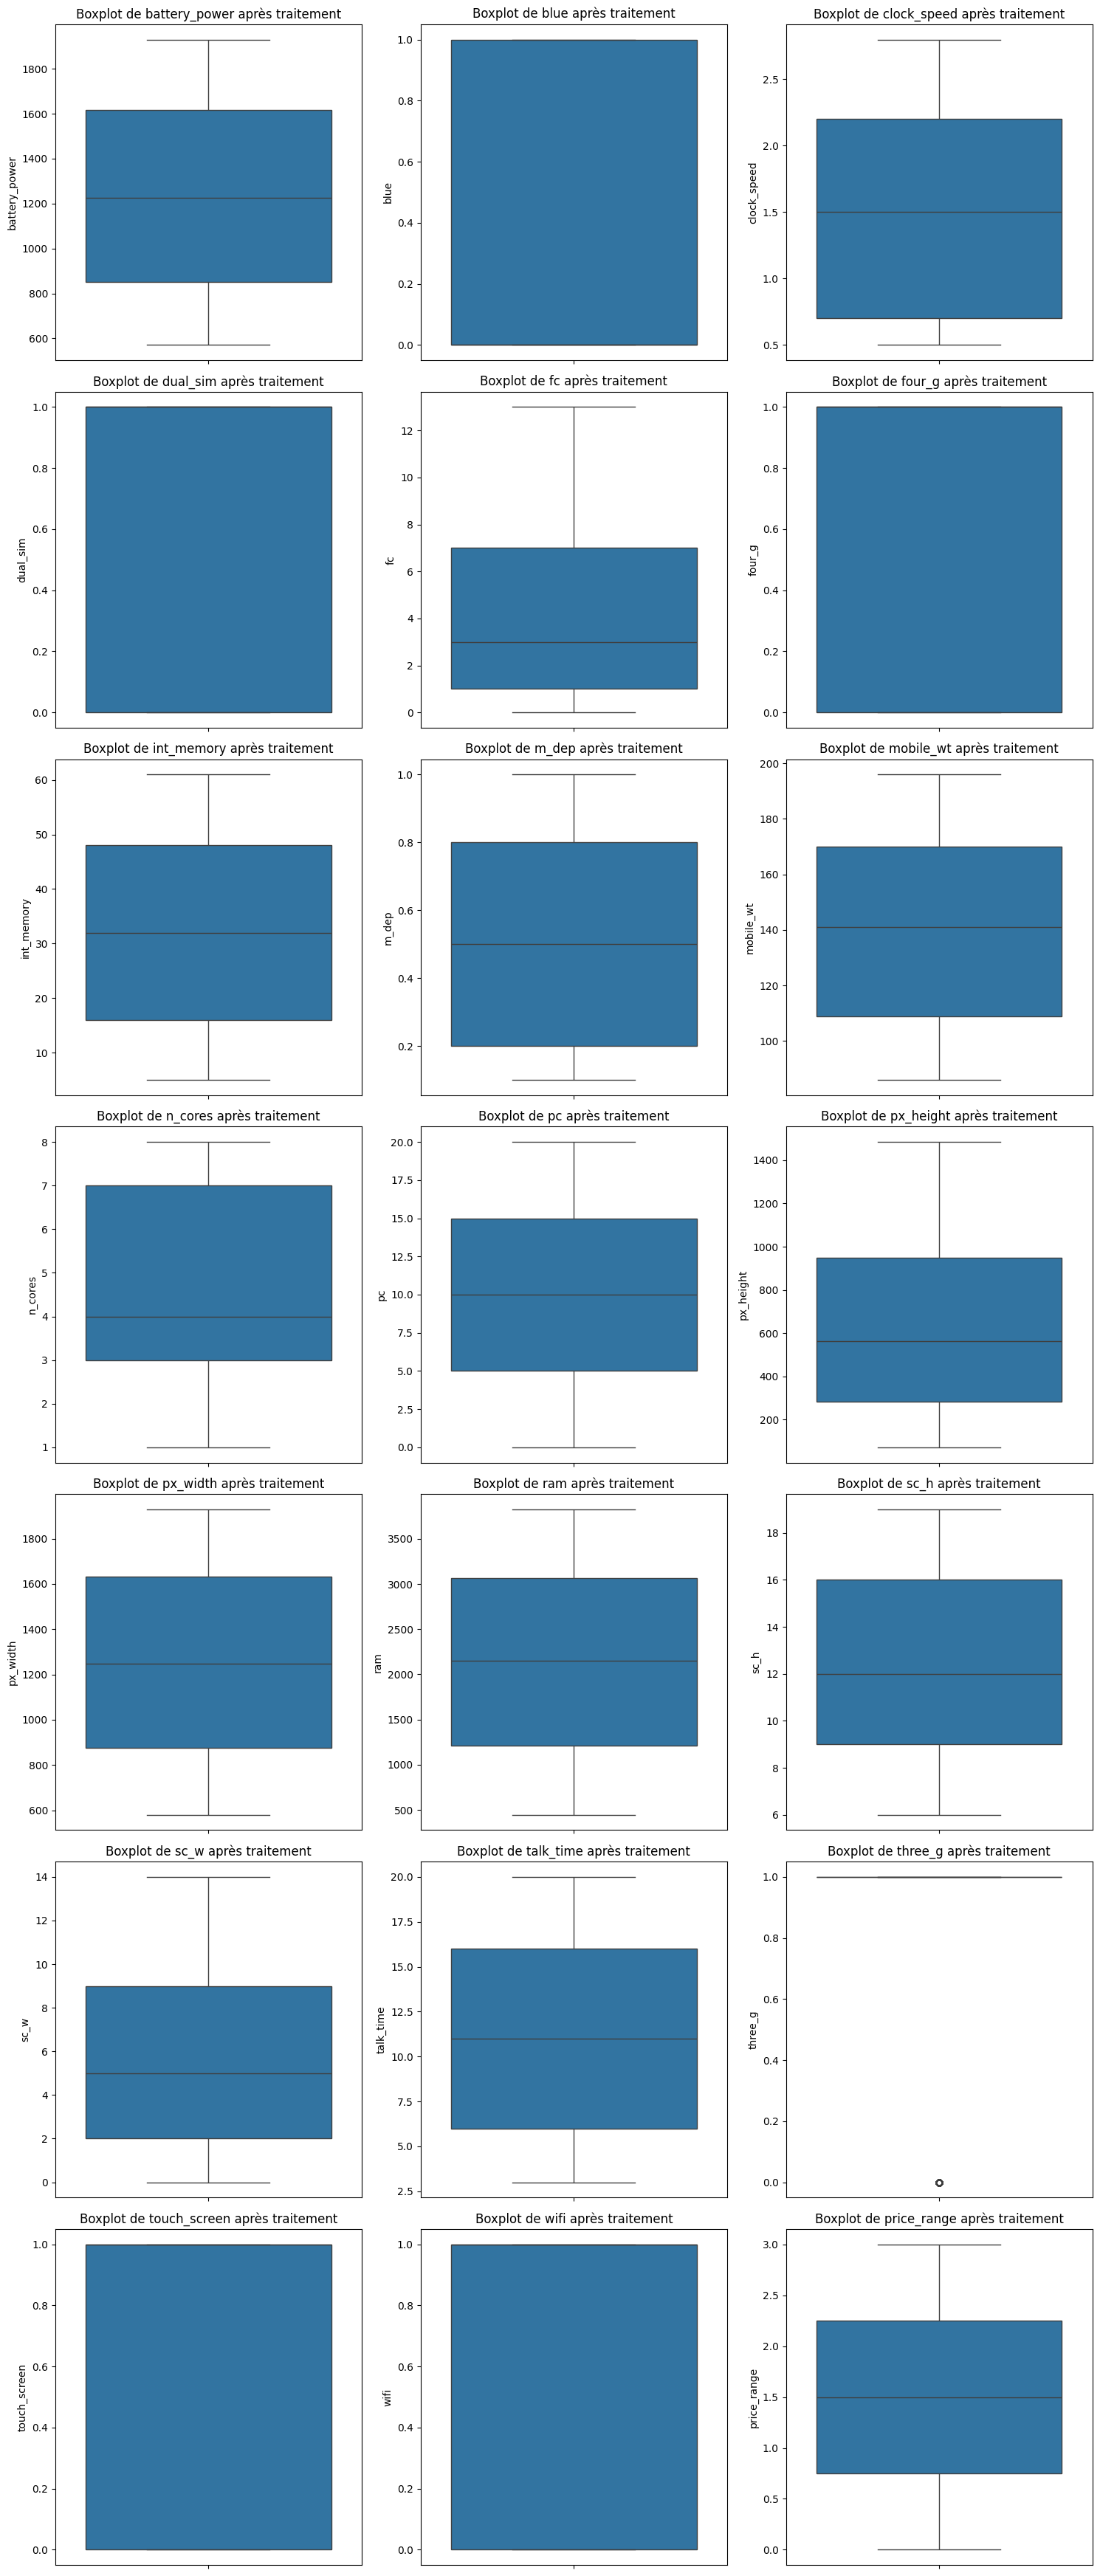

In [35]:
# Détecter et traiter les valeurs aberrantes

# Visualiser les données avec des boxplots pour détecter les valeurs aberrantes
# Calculate the number of rows and columns for subplots
num_columns = len(data.select_dtypes(include=np.number).columns)
num_rows = (num_columns + 2) // 3  # 3 columns per row

plt.figure(figsize=(15, 5 * num_rows))
for i, column in enumerate(data.select_dtypes(include=np.number).columns, 1):
    plt.subplot(num_rows, 3, i)
    sns.boxplot(y=data[column])
    plt.title(f"Boxplot de {column}")
plt.tight_layout()
plt.show()

# Définir une fonction pour traiter les valeurs aberrantes par clipping
def clip_outliers(data, column, lower_percentile=0.05, upper_percentile=0.95):
    lower_bound = data[column].quantile(lower_percentile)
    upper_bound = data[column].quantile(upper_percentile)
    data[column] = np.clip(data[column], lower_bound, upper_bound)

# Appliquer le clipping sur toutes les colonnes numériques
for column in data.select_dtypes(include=np.number).columns:
    clip_outliers(data, column)

# Vérifier les données après traitement des valeurs aberrantes
plt.figure(figsize=(15, 5 * num_rows))
for i, column in enumerate(data.select_dtypes(include=np.number).columns, 1):
    plt.subplot(num_rows, 3, i)
    sns.boxplot(y=data[column])
    plt.title(f"Boxplot de {column} après traitement")
plt.tight_layout()
plt.show()

# **Partie 3: Modele de ML**

In [4]:
X = data.drop(columns = ["price_range"])
Y = data["price_range"]

In [37]:
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842.0000,0,2.2,0,1,0,7,0.6,188,2,...,70.9975,756.0000,2549.0000,9,7,19,0,0,1,1
1,1021.0000,1,0.5,1,0,1,53,0.7,136,3,...,905.0000,1929.0025,2631.0000,17,3,7,1,1,0,2
2,570.9975,1,0.5,1,2,1,41,0.9,145,5,...,1263.0000,1716.0000,2603.0000,11,2,9,1,1,0,2
3,615.0000,1,2.5,0,0,0,10,0.8,131,6,...,1216.0000,1786.0000,2769.0000,16,8,11,1,0,0,2
4,1821.0000,1,1.2,0,13,1,44,0.6,141,2,...,1208.0000,1212.0000,1411.0000,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794.0000,1,0.5,1,0,1,5,0.8,106,6,...,1222.0000,1890.0000,668.0000,13,4,19,1,1,0,0
1996,1930.0075,1,2.6,1,0,0,39,0.2,187,4,...,915.0000,1929.0025,2032.0000,11,10,16,1,1,1,2
1997,1911.0000,0,0.9,1,1,1,36,0.7,108,8,...,868.0000,1632.0000,3057.0000,9,1,5,1,1,0,3
1998,1512.0000,0,0.9,0,4,1,46,0.1,145,5,...,336.0000,670.0000,869.0000,18,10,19,1,1,1,0


In [38]:
Y.value_counts()

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64

In [39]:
print(X.shape)
print(X.ndim)

(2000, 20)
2


In [40]:
print(Y.shape)
print(Y.ndim)

(2000,)
1


- **Diviser les donnees en train et test**

In [5]:
X_train , X_test , Y_train , Y_test = train_test_split( X , Y , 
                    test_size = 0.2 , random_state = 42 )

In [6]:
from sklearn.preprocessing import StandardScaler , MinMaxScaler
# Normalisation des données

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [43]:
X_train.shape

(1600, 20)

In [44]:
X_test.shape

(400, 20)

- **Creation de modele**

In [7]:
model = LogisticRegression()

- **Entrainement de Modele**

In [8]:
model.fit(X_train , Y_train)

LogisticRegression()

- **Prediction de modele**

In [47]:
# Prédiction sur les données de test
y_pred = model.predict(X_test)

- **Evaluation de Modele**

In [53]:
# Accuracy du modèle
accuracy = accuracy_score(Y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

rappel = recall_score(Y_test, y_pred, average='macro')
print(f"recall_score : {rappel:.2f}")

F1_score = f1_score(Y_test, y_pred, average='macro')
print(f"f1_score : {F1_score:.2f}")

precision = precision_score(Y_test, y_pred, average='macro')
print(f"precision_score : {precision:.2f}")

#report = classification_report(Y_test , y_pred )
#print(f"classification_report : {classification_report}")

Accuracy: 0.97
recall_score : 0.97
f1_score : 0.97
precision_score : 0.97


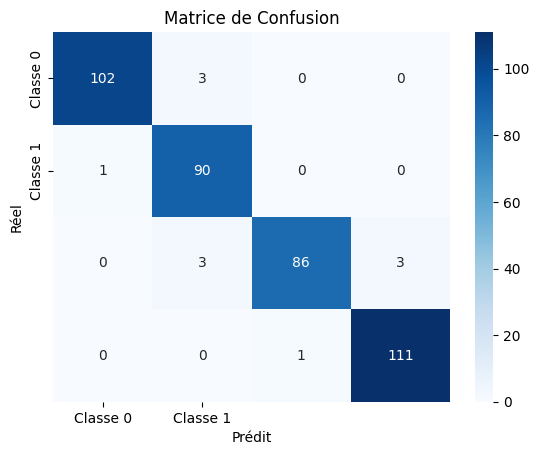

In [54]:
# Matrice de confusion
conf_matrix = confusion_matrix(Y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
xticklabels=['Classe 0', 'Classe 1'],
yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de Confusion')
plt.show()

In [55]:
# Calcule du porcentaje de error de chaque classe
total_samples_per_class = conf_matrix.sum(axis=1)
error_per_class = (total_samples_per_class - np.diag(conf_matrix)) / total_samples_per_class * 100

# Mostrer le porcentaje de error de chaque classe
for i, error in enumerate(error_per_class):
     print(f"Porcentaje de error de la clase {i}: {error:.2f}%")

Porcentaje de error de la clase 0: 2.86%
Porcentaje de error de la clase 1: 1.10%
Porcentaje de error de la clase 2: 6.52%
Porcentaje de error de la clase 3: 0.89%


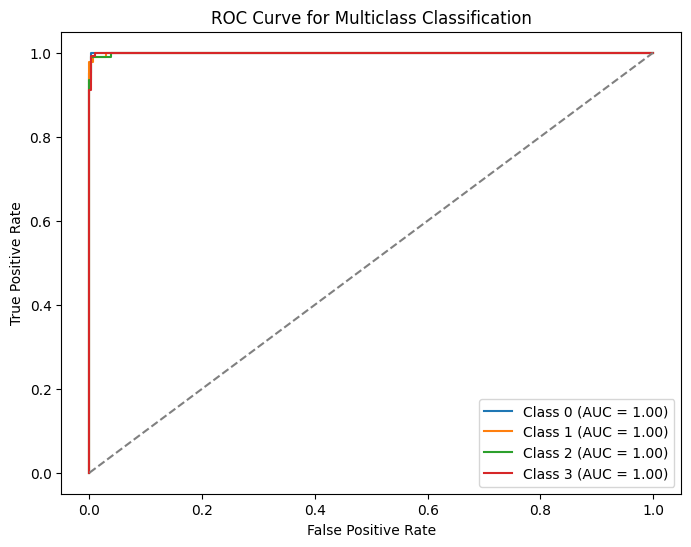

In [57]:
from sklearn.metrics import auc
from sklearn.preprocessing import label_binarize

# Binarize the output labels for multiclass ROC
classes = sorted(Y_test.unique())
Y_test_binarized = label_binarize(Y_test, classes=classes)
n_classes = Y_test_binarized.shape[1]

# Compute ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
	fpr[i], tpr[i], _ = roc_curve(Y_test_binarized[:, i], model.predict_proba(X_test)[:, i])
	roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
for i in range(n_classes):
	plt.plot(fpr[i], tpr[i], label=f'Class {classes[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass Classification')
plt.legend()
plt.show()

### **Validation du modele**

In [58]:
from sklearn.model_selection import cross_val_score, KFold

# Configuration de KFold
kf = KFold(n_splits = 5 , shuffle = True, random_state = 42)

# Calcul des scores de validation croisée
cv_scores = cross_val_score(model , X, Y ,
                         cv = kf, scoring = 'accuracy')

# Affichage des résultats     
print(f"Scores de validation croisee : {cv_scores}")
print(f"Score moyen : {cv_scores.mean():.2f}") 

C:\Users\Pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/mod

Scores de validation croisee : [0.6375 0.6475 0.635  0.66   0.5925]
Score moyen : 0.63


C:\Users\Pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [59]:
# Prédiction sur les données de test
y_pred_0 = model.predict(X_test)

# Accuracy du modèle
accuracy = accuracy_score(Y_test , y_pred_0)
print(f"Accuracy de test est : {accuracy:.2f}")

# prediction sur les donnees de train
y_pred_1 = model.predict(X_train)
acc = accuracy_score( Y_train , y_pred_1)
print(f"Accuracy de train est : {acc:.2f}")

Accuracy de test est : 0.97
Accuracy de train est : 0.97


# **Modele de KNN**

In [62]:
from sklearn.neighbors import KNeighborsClassifier

# 4. Initialiser le modèle KNN avec K=5
knn = KNeighborsClassifier(n_neighbors = 5 )

# 5. Entraîner le modèle
knn.fit(X_train, Y_train)

# 6. Faire des prédictions
y_pred_K = knn.predict(X_test)

# 7. Évaluer le modèle
accuracy = accuracy_score(Y_test, y_pred_K)
print(f"Précision du modèle KNN : {accuracy:.2f}")

F1 = f1_score(Y_test, y_pred_K, average='macro')
print(f"f1_score : {F1:.2f}")

recall = recall_score(Y_test, y_pred_K, average='macro')
print(f"recall_score : {recall:.2f}")

Précision du modèle KNN : 0.52
f1_score : 0.52
recall_score : 0.51


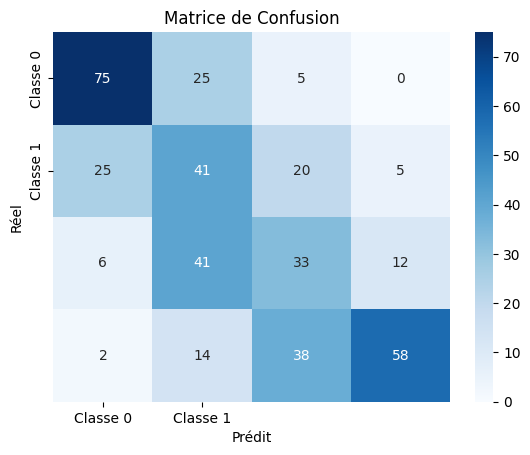

In [63]:
# Matrice de confusion
conf_matrix = confusion_matrix(Y_test, y_pred_K)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
xticklabels=['Classe 0', 'Classe 1'],
yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de Confusion')
plt.show()

In [64]:
# Calcule du porcentaje de error de chaque classe
total_samples_per_class = conf_matrix.sum(axis=1)
error_per_class = (total_samples_per_class - np.diag(conf_matrix)) / total_samples_per_class * 100

# Mostrer le porcentaje de error de chaque classe
for i, error in enumerate(error_per_class):
     print(f"Porcentaje de error de la clase {i}: {error:.2f}%")

Porcentaje de error de la clase 0: 28.57%
Porcentaje de error de la clase 1: 54.95%
Porcentaje de error de la clase 2: 64.13%
Porcentaje de error de la clase 3: 48.21%


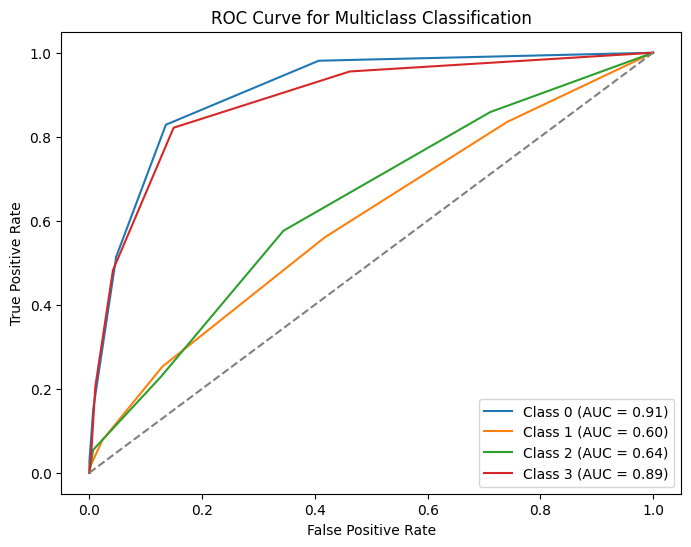

In [66]:
from sklearn.metrics import auc
from sklearn.preprocessing import label_binarize

# Binarize the output labels for multiclass ROC
classes = sorted(Y_test.unique())
Y_test_binarized = label_binarize(Y_test, classes=classes)
n_classes = Y_test_binarized.shape[1]

# Compute ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
	fpr[i], tpr[i], _ = roc_curve(Y_test_binarized[:, i], knn.predict_proba(X_test)[:, i])
	roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
for i in range(n_classes):
	plt.plot(fpr[i], tpr[i], label=f'Class {classes[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass Classification')
plt.legend()
plt.show()

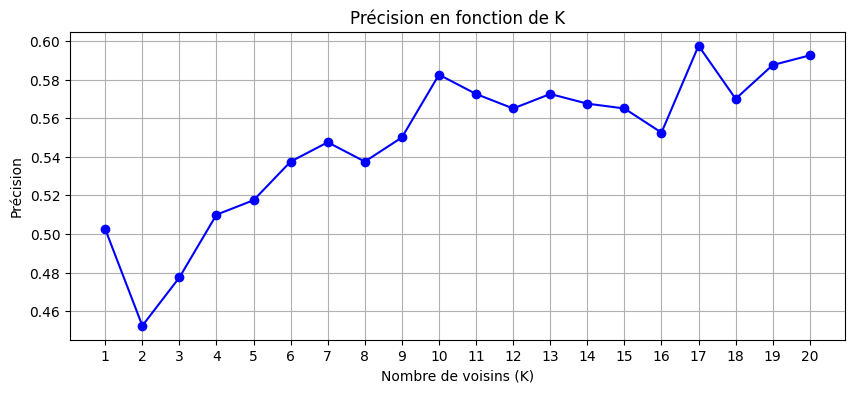

In [67]:
# Liste pour stocker les précisions
accuracies = []

# Tester différents K
k_values = range(1, 21)
for k in k_values:
     knn = KNeighborsClassifier(n_neighbors=k)
     knn.fit(X_train, Y_train)
     y_pred = knn.predict(X_test)
     accuracies.append(accuracy_score(Y_test, y_pred))

# Visualisation
plt.figure(figsize=(10, 4))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b')
plt.title("Précision en fonction de K")
plt.xlabel("Nombre de voisins (K)")
plt.ylabel("Précision")
plt.xticks(k_values)
plt.grid()
plt.show()

## **Validation de modele KNN**

In [68]:
from sklearn.model_selection import cross_val_score, KFold

# Configuration de KFold
kf = KFold(n_splits = 7 , shuffle = True, random_state = 42)

# Calcul des scores de validation croisée
cv_scores = cross_val_score(knn , X, Y ,
                         cv = kf, scoring = 'accuracy')

# Affichage des résultats     
print(f"Scores de validation croisee : {cv_scores}")
print(f"Score moyen : {cv_scores.mean():.2f}") 

Scores de validation croisee : [0.92657343 0.91958042 0.94055944 0.94055944 0.92657343 0.90175439
 0.93333333]
Score moyen : 0.93


In [69]:
# Prédiction sur les données de test
y_pred_KNN = knn.predict(X_test)

# Accuracy du modèle
accuracy = accuracy_score(Y_test , y_pred_KNN)
print(f"Accuracy de test est : {accuracy:.2f}")

# prediction sur les donnees de train
y_pred_KN = knn.predict(X_train)
acc = accuracy_score( Y_train , y_pred_KN)
print(f"Accuracy de train est : {acc:.2f}")

Accuracy de test est : 0.59
Accuracy de train est : 0.69


## **Modele de Decision Tree**

Précision du modèle : 0.84


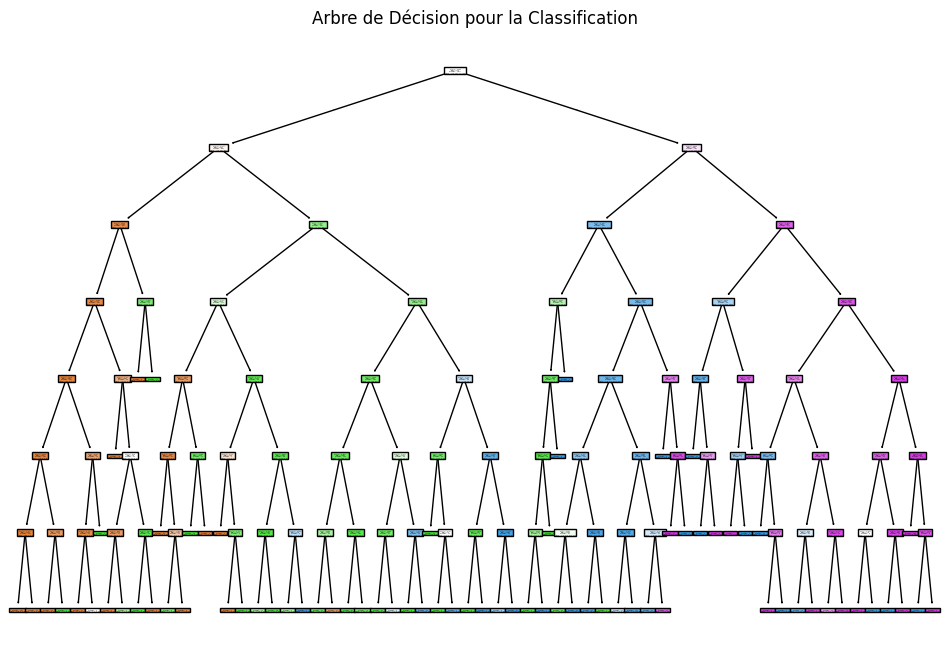

In [70]:
# Importation des bibliothèques
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Création et entraînement du modèle Decision Tree
dt = DecisionTreeClassifier(criterion = "gini", max_depth = 7, random_state = 42)
dt.fit(X_train, Y_train)

# Prédiction sur les données test
y_pred_X = dt.predict(X_test)

# Évaluation du modèle
accuracy = accuracy_score(Y_test, y_pred_X)
print(f"Précision du modèle : {accuracy:.2f}")

# Visualisation de l’arbre de décision
plt.figure(figsize = (12, 8))
tree.plot_tree( dt , filled = True ,)
plt.title("Arbre de Décision pour la Classification")
plt.show()

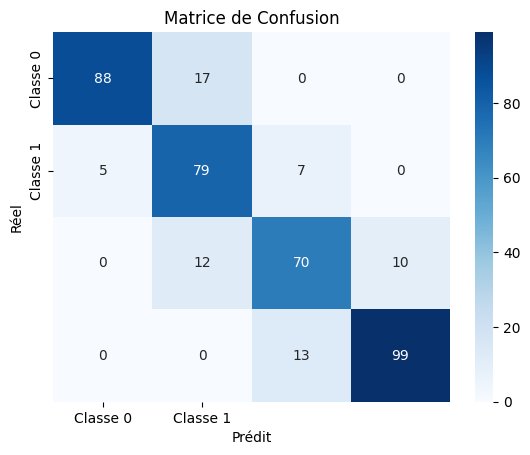

In [71]:
# Matrice de confusion
conf_matrix = confusion_matrix(Y_test, y_pred_X)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
xticklabels=['Classe 0', 'Classe 1'],
yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de Confusion')
plt.show()

In [72]:
# Calcule du porcentaje de error de chaque classe
total_samples_per_class = conf_matrix.sum(axis=1)
error_per_class = (total_samples_per_class - np.diag(conf_matrix)) / total_samples_per_class * 100

# Mostrer le porcentaje de error de chaque classe
for i, error in enumerate(error_per_class):
     print(f"Porcentaje de error de la clase {i}: {error:.2f}%")

Porcentaje de error de la clase 0: 16.19%
Porcentaje de error de la clase 1: 13.19%
Porcentaje de error de la clase 2: 23.91%
Porcentaje de error de la clase 3: 11.61%


<Figure size 800x600 with 0 Axes>

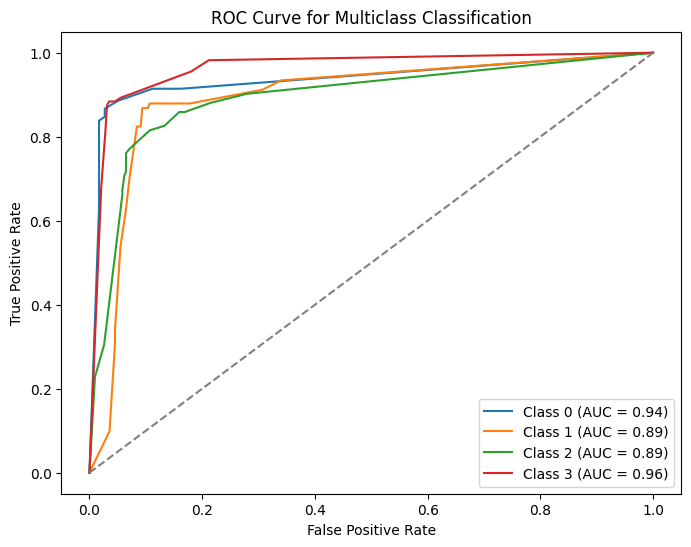

In [76]:
from sklearn.metrics import auc

from sklearn.preprocessing import label_binarize

# Binarize the output labels for multiclass ROC
classes = sorted(Y_test.unique())
Y_test_binarized = label_binarize(Y_test, classes=classes)
n_classes = Y_test_binarized.shape[1]

# Compute ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
	fpr[i], tpr[i], _ = roc_curve(Y_test_binarized[:, i], dt.predict_proba(X_test)[:, i])
	roc_auc[i] = auc(fpr[i], tpr[i])

# Affichage de la courbe ROC
plt.figure(figsize=(8, 6))
# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
for i in range(n_classes):
	plt.plot(fpr[i], tpr[i], label=f'Class {classes[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass Classification')
plt.legend()
plt.show()

## **Validation de Modele Desision Tree**

In [77]:
from sklearn.model_selection import cross_val_score, KFold

# Configuration de KFold
kf = KFold(n_splits = 7 , shuffle = True, random_state = 42)

# Calcul des scores de validation croisée
cv_scores = cross_val_score(dt , X, Y ,
                         cv = kf, scoring = 'accuracy')

# Affichage des résultats     
print(f"Scores de validation croisee : {cv_scores}")
print(f"Score moyen : {cv_scores.mean():.2f}") 

Scores de validation croisee : [0.83566434 0.81818182 0.82867133 0.81818182 0.85664336 0.77894737
 0.86315789]
Score moyen : 0.83


In [78]:
# Prédiction sur les données de test
y_pred_ = dt.predict(X_test)

# Accuracy du modèle
accuracy = accuracy_score(Y_test , y_pred_)
print(f"Accuracy de test est : {accuracy:.2f}")

# prediction sur les donnees de train
y_pred__ = dt.predict(X_train)
acc = accuracy_score( Y_train , y_pred__)
print(f"Accuracy de train est : {acc:.2f}")

Accuracy de test est : 0.84
Accuracy de train est : 0.95


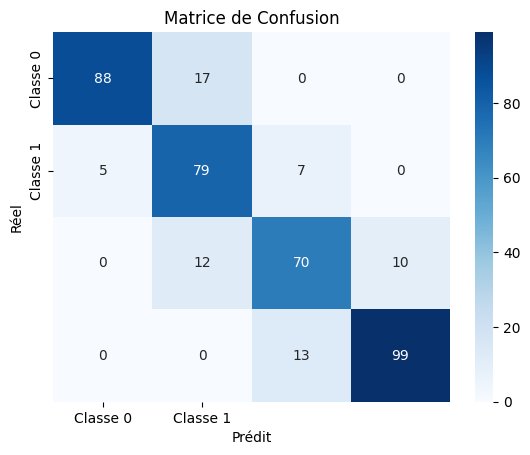

In [79]:
# Matrice de confusion
conf_matrix = confusion_matrix(Y_test, y_pred_)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
xticklabels=['Classe 0', 'Classe 1'],
yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de Confusion')
plt.show()

In [80]:
# Calcule du porcentaje de error de chaque classe
total_samples_per_class = conf_matrix.sum(axis=1)
error_per_class = (total_samples_per_class - np.diag(conf_matrix)) / total_samples_per_class * 100

# Mostrer le porcentaje de error de chaque classe
for i, error in enumerate(error_per_class):
     print(f"Porcentaje de error de la clase {i}: {error:.2f}%")

Porcentaje de error de la clase 0: 16.19%
Porcentaje de error de la clase 1: 13.19%
Porcentaje de error de la clase 2: 23.91%
Porcentaje de error de la clase 3: 11.61%


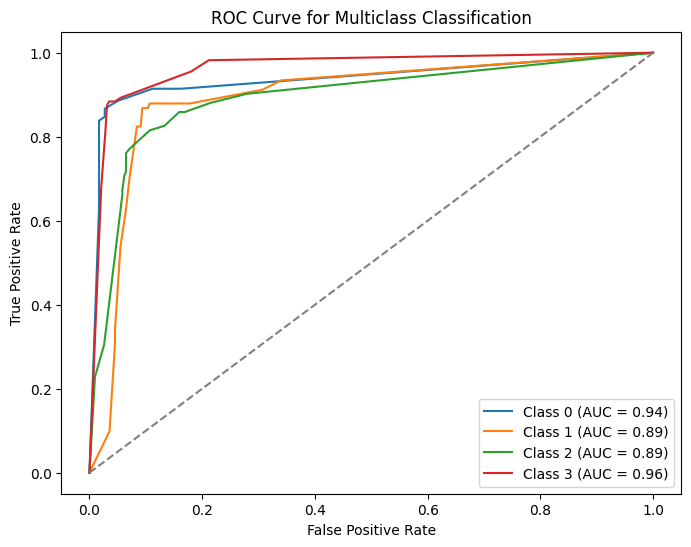

In [82]:
from sklearn.metrics import auc

from sklearn.preprocessing import label_binarize

# Binarize the output labels for multiclass ROC
classes = sorted(Y_test.unique())
Y_test_binarized = label_binarize(Y_test, classes=classes)
n_classes = Y_test_binarized.shape[1]

# Compute ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
	fpr[i], tpr[i], _ = roc_curve(Y_test_binarized[:, i], dt.predict_proba(X_test)[:, i])
	roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
for i in range(n_classes):
	plt.plot(fpr[i], tpr[i], label=f'Class {classes[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass Classification')
plt.legend()
plt.show()

# **Modele de RandomForest**

In [83]:
from sklearn.ensemble import RandomForestClassifier  

# Création et entraînement du modèle Random Forest
rf_classifier = RandomForestClassifier(n_estimators = 80,
                         criterion = "gini", max_depth = 14,
random_state=42)
rf_classifier.fit(X_train, Y_train)

# Prédiction sur les données test
y_pred = rf_classifier.predict(X_test)

# Évaluation du modèle
accuracy = accuracy_score(Y_test, y_pred)
print(f"Précision du modèle : {accuracy:.2f}")
#print("\nRapport de classification :\n", classification_report(Y_test, y_pred))
#print("\nMatrice de confusion :\n", confusion_matrix(Y_test, y_pred))

Précision du modèle : 0.89


In [84]:
from sklearn.model_selection import cross_val_score, KFold

# Configuration de KFold
kf = KFold(n_splits = 7 , shuffle = True, random_state = 42)

# Calcul des scores de validation croisée
cv_scores = cross_val_score(rf_classifier , X, Y ,
                         cv = kf, scoring = 'accuracy')

# Affichage des résultats     
print(f"Scores de validation croisee : {cv_scores}")
print(f"Score moyen : {cv_scores.mean():.2f}") 

Scores de validation croisee : [0.89160839 0.87062937 0.87062937 0.88461538 0.88461538 0.85614035
 0.85964912]
Score moyen : 0.87


In [85]:
# Prédiction sur les données de test
y_pred_ = rf_classifier.predict(X_test)

# Accuracy du modèle
accuracy = accuracy_score(Y_test , y_pred_)
print(f"Accuracy de test est : {accuracy:.2f}")

# prediction sur les donnees de train
y_pred__ = rf_classifier.predict(X_train)
acc = accuracy_score( Y_train , y_pred__)
print(f"Accuracy de train est : {acc:.2f}")

Accuracy de test est : 0.89
Accuracy de train est : 1.00


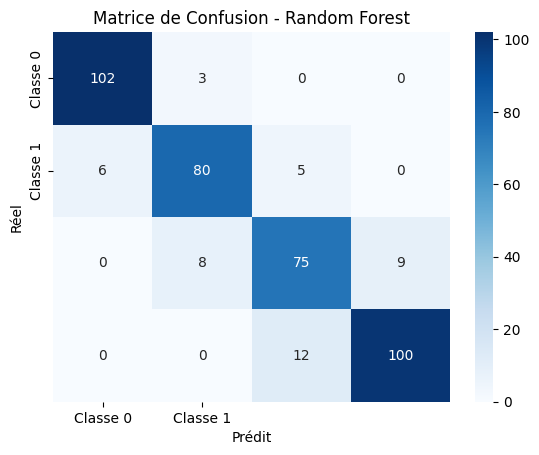

In [86]:
# Matrice de confusion pour le modèle Random Forest
conf_matrix_rf = confusion_matrix(Y_test, y_pred_)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues',
               xticklabels=['Classe 0', 'Classe 1'],
               yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de Confusion - Random Forest')
plt.show()

In [87]:
# Calcule du porcentaje de error de chaque classe
total_samples_per_class = conf_matrix.sum(axis=1)
error_per_class = (total_samples_per_class - np.diag(conf_matrix)) / total_samples_per_class * 100

# Mostrar el porcentaje de error para cada clase
for i, error in enumerate(error_per_class):
     print(f"Porcentaje de error de la clase {i}: {error:.2f}%")

Porcentaje de error de la clase 0: 16.19%
Porcentaje de error de la clase 1: 13.19%
Porcentaje de error de la clase 2: 23.91%
Porcentaje de error de la clase 3: 11.61%


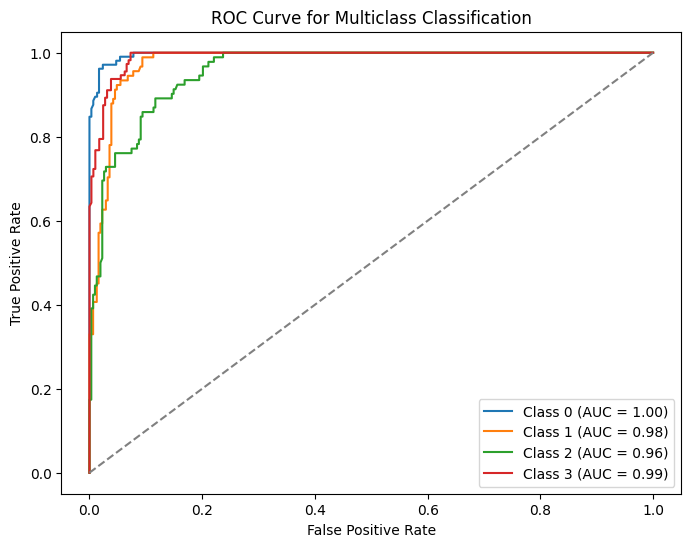

In [89]:
from sklearn.metrics import auc

from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Binarize the output labels for multiclass ROC
classes = sorted(Y_test.unique())
Y_test_binarized = label_binarize(Y_test, classes=classes)
n_classes = Y_test_binarized.shape[1]

# Compute ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
	fpr[i], tpr[i], _ = roc_curve(Y_test_binarized[:, i], rf_classifier.predict_proba(X_test)[:, i])
	roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
for i in range(n_classes):
	plt.plot(fpr[i], tpr[i], label=f'Class {classes[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass Classification')
plt.legend()
plt.show()

# **Modele de SVM**

In [90]:
from sklearn.svm import SVC

# 3. Initialiser le modèle SVM
SVM_ = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)

# 4. Entraîner le modèle
SVM_.fit(X_train, Y_train)

# 5. Prédiction sur X_test (données réelles)
Y_pred = SVM_.predict(X_test)

# 6. Évaluation du modèle
#print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       105
           1       0.82      0.89      0.85        91
           2       0.86      0.82      0.84        92
           3       0.96      0.93      0.95       112

    accuracy                           0.90       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.90      0.90      0.90       400



In [91]:
from sklearn.model_selection import cross_val_score, KFold

# Configuration de KFold
kf = KFold(n_splits = 7 , shuffle = True, random_state = 42)

# Calcul des scores de validation croisée
cv_scores = cross_val_score(SVM_ , X, Y ,
                         cv = kf, scoring = 'accuracy')

# Affichage des résultats     
print(f"Scores de validation croisee : {cv_scores}")
print(f"Score moyen : {cv_scores.mean():.2f}") 

Scores de validation croisee : [0.95804196 0.94405594 0.95804196 0.93706294 0.94755245 0.93684211
 0.96140351]
Score moyen : 0.95


In [92]:
# Prédiction sur les données de test
y_pred_SVM_ = SVM_.predict(X_test)

# Accuracy du modèle
accuracy = accuracy_score(Y_test , y_pred_SVM_)
print(f"Accuracy de test est : {accuracy:.2f}")

# prediction sur les donnees de train
y_pred_SVM = SVM_.predict(X_train)
acc = accuracy_score( Y_train , y_pred_SVM)
print(f"Accuracy de train est : {acc:.2f}")

Accuracy de test est : 0.90
Accuracy de train est : 0.98


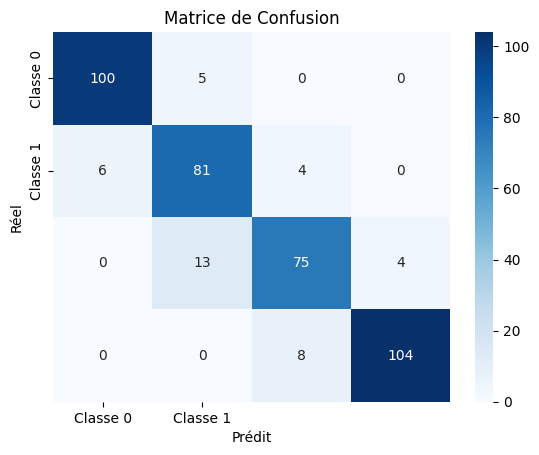

In [93]:
# Matrice de confusion
conf_matrix = confusion_matrix(Y_test, y_pred_SVM_)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
xticklabels=['Classe 0', 'Classe 1'],
yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de Confusion')
plt.show()

In [94]:
# Calcule du porcentaje de error de chaque classe
total_samples_per_class = conf_matrix.sum(axis=1)
error_per_class = (total_samples_per_class - np.diag(conf_matrix)) / total_samples_per_class * 100

# Mostrar el porcentaje de error para cada clase
for i, error in enumerate(error_per_class):
     print(f"Porcentaje de error de la clase {i}: {error:.2f}%")

Porcentaje de error de la clase 0: 4.76%
Porcentaje de error de la clase 1: 10.99%
Porcentaje de error de la clase 2: 18.48%
Porcentaje de error de la clase 3: 7.14%


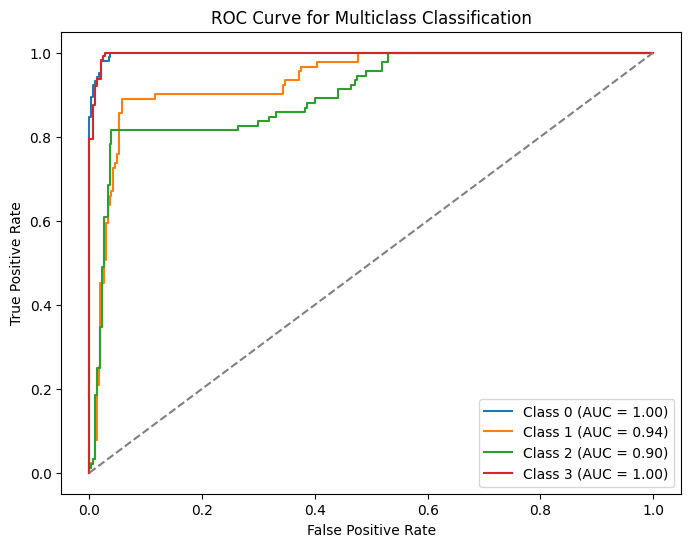

In [99]:
from sklearn.metrics import auc

from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Binarize the output labels for multiclass ROC
classes = sorted(Y_test.unique())
Y_test_binarized = label_binarize(Y_test, classes=classes)
n_classes = Y_test_binarized.shape[1]

# Ensure the SVM model supports decision_function
if hasattr(SVM_, "decision_function"):
	y_scores = SVM_.decision_function(X_test)

# Compute ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
	fpr[i], tpr[i], _ = roc_curve(Y_test_binarized[:, i], y_scores[:, i])
	roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
for i in range(n_classes):
	plt.plot(fpr[i], tpr[i], label=f'Class {classes[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass Classification')
plt.legend()
plt.show()

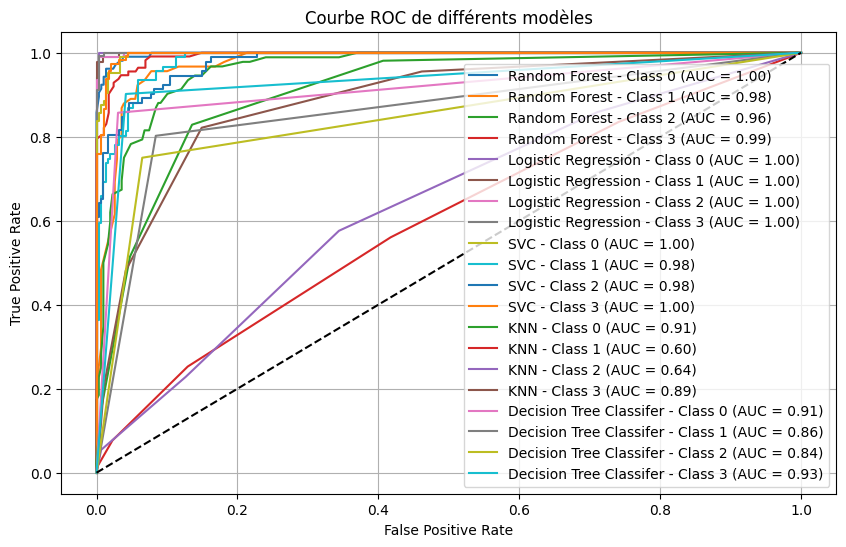

In [101]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier


models = {
    "Random Forest": RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(class_weight='balanced', max_iter=1000),
    "SVC": SVC(probability=True, class_weight='balanced'),
    "KNN": KNeighborsClassifier(),
    "Decision Tree Classifer" : DecisionTreeClassifier()
    #"Gradient Boosting": GradientBoostingClassifier()
}
plt.figure(figsize=(10, 6))

from sklearn.preprocessing import label_binarize

# Binarize the output labels for multiclass ROC
classes = sorted(Y_test.unique())
Y_test_binarized = label_binarize(Y_test, classes=classes)

for name, model in models.items():
    model.fit(X_train, Y_train)
    if hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(X_test)
    else:
        y_scores = model.decision_function(X_test)

    # Compute ROC curve and AUC for each class
    for i, class_label in enumerate(classes):
        fpr, tpr, _ = roc_curve(Y_test_binarized[:, i], y_scores[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} - Class {class_label} (AUC = {roc_auc:.2f})')

# Tracer la ligne de référence
plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC de différents modèles')
plt.legend(loc ='lower right')
plt.grid(True)
plt.show()

In [102]:
clas_report_Logisic = classification_report(Y_test, y_pred)
print(clas_report_Logisic)

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       105
           1       0.88      0.88      0.88        91
           2       0.82      0.82      0.82        92
           3       0.92      0.89      0.90       112

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.89      0.89      0.89       400



## **Predection de nouvelle valeur *Modele de RandomForest***

In [103]:
# Dictionnaire des modèles et leurs accuracies
model_accuracies = {
     "Logistic Regression": accuracy_score(Y_test, y_pred_0),
     "KNN": accuracy_score(Y_test, y_pred_KNN),
     "Decision Tree": accuracy_score(Y_test, y_pred_X),
     "Random Forest": accuracy_score(Y_test, y_pred_),
     "SVM": accuracy_score(Y_test, y_pred_SVM_)
}

# Affichage des accuracies
for model_name, acc in model_accuracies.items():
     print(f"Accuracy de {model_name} : {acc:.2f}")

Accuracy de Logistic Regression : 0.97
Accuracy de KNN : 0.59
Accuracy de Decision Tree : 0.84
Accuracy de Random Forest : 0.89
Accuracy de SVM : 0.90


In [6]:
import joblib

# Save the Logistic Regression model
joblib.dump(model, 'logistic_regression_model.pkl')

print("Logistic Regression model saved successfully!")

Logistic Regression model saved successfully!
